In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 

In [70]:
df = pd.read_csv("weight-height.csv")

In [71]:
df.head()

,Cinsiyet,Kilo,Boy
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cinsiyet  10000 non-null  int64  
 1   Kilo      10000 non-null  float64
 2   Boy       10000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [73]:
y = df["Kilo"]
X = df["Boy"]
X.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Boy, dtype: float64

In [74]:
df

,Cinsiyet,Kilo,Boy
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461


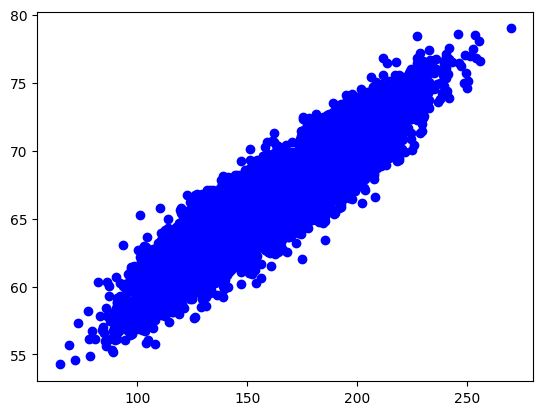

In [75]:
plt.scatter(X,y, c ="blue")
## To show the plot
plt.show()

In [76]:
## Standardize etmek birden fazla feature oldugu zaman  featurelardan birinin etkisinin daha fazla olmasini engellemek icin yapilir.
def standardize(X):
    return (X - X.mean())/X.std()
X = standardize(X)

In [77]:
# 1. Asama Parametreleri rastgele baslat
beta0 = np.random.rand() 
beta1 = np.random.rand()
alpha = 0.00001

In [78]:
def tahmin(X,beta0,beta1):
    return beta0 + beta1*X

In [79]:
# 2. Asama verilen parametrelerle SSE degerlerini hesapla
def sse(y,ypred):
    return np.sum((y-ypred)**2)

In [80]:
# 3. Aşama: Gradyanları hesapla
def gradyan(y,ypred,X):
    grad_beta0 = np.sum((ypred-y)*1)
    grad_beta1 = np.sum((ypred-y)*X)
    return grad_beta0,grad_beta1

In [81]:
# 4. Aşama: Gradyanı verilen parametreleri güncelle
def parametreleri_guncelle(beta0,beta1,grad_beta0,grad_beta1,alpha): 
    beta0_new = beta0 - alpha * grad_beta0
    beta1_new = beta1 - alpha * grad_beta1
    return beta0_new,beta1_new

In [82]:
# 5. Aşama: 2-4 arasındaki adımları bir değere yakınsayana kadar tekrarlayın
num_iter = 1000     # iterasyon sayisi     
SSE_list = []       
ypred_list = []
for i in range(num_iter):
    ypred = tahmin(X,beta0,beta1)
    J = sse(y,ypred)
    SSE_list.append(J)
    grad_beta0, grad_beta1 = gradyan(y,ypred,X)
    beta0, beta1 = parametreleri_guncelle(beta0,beta1,grad_beta0,grad_beta1,alpha)
    ypred_list.append(ypred)
SSE_list

[44087124.77256265,
 35714646.37514754,
 28932938.44388245,
 23439754.671769332,
 18990275.534642857,
 15386197.205376297,
 12466893.573829053,
 10102257.482550975,
 8186902.127335947,
 6635464.191372959,
 5378799.383667734,
 4360900.824969154,
 3536402.940211689,
 2868559.6112657953,
 2327606.4805620597,
 1889434.416942792,
 1534515.0229338007,
 1247030.2955794302,
 1014167.6516743213,
 825548.898164983,
 672767.6981457812,
 549014.9182919781,
 448775.16026127327,
 367580.9511134973,
 301813.6375379538,
 248542.11016735336,
 205392.17026383447,
 170440.71672793548,
 142130.03757043788,
 119198.38600016304,
 100623.74705152589,
 85578.28854996973,
 73391.46639163213,
 63520.13981798306,
 55524.364786744816,
 49047.78660110151,
 43801.75793834717,
 39552.47445227949,
 36110.554610478444,
 33322.59936196574,
 31064.355467577407,
 29235.177797215132,
 27753.543790334268,
 26553.420168710458,
 25581.31997359287,
 24793.91876564863,
 24156.123746794896,
 23639.509748783217,
 23221.052383873

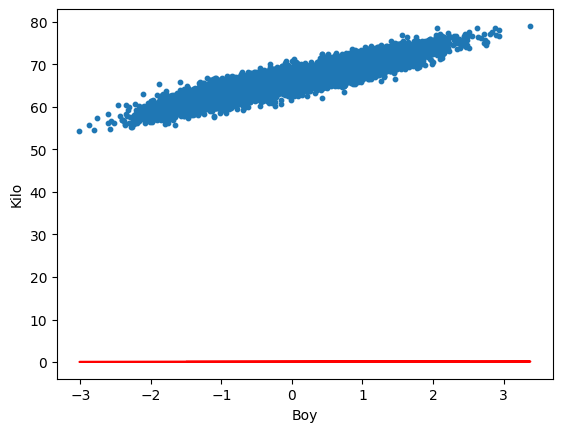

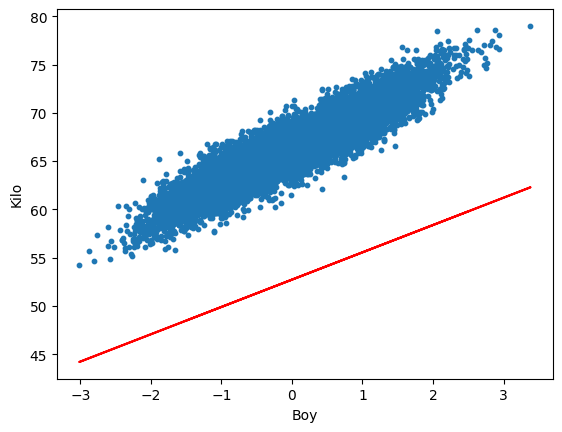

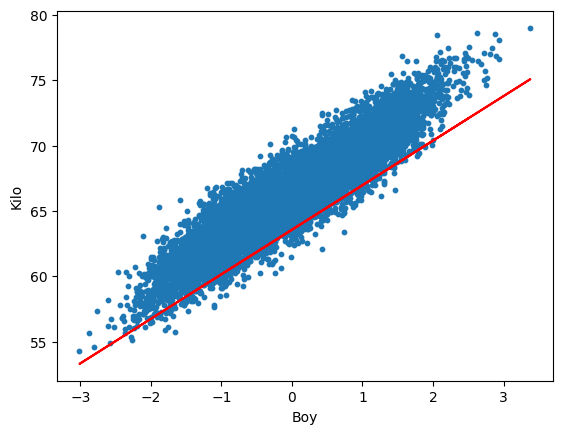

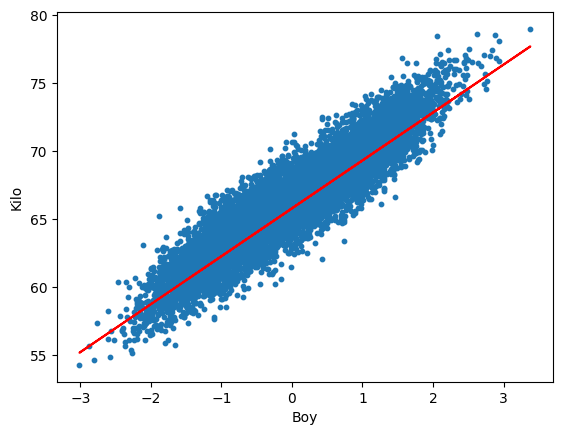

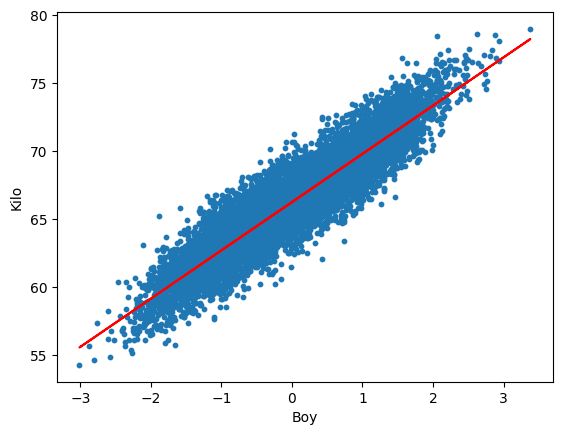

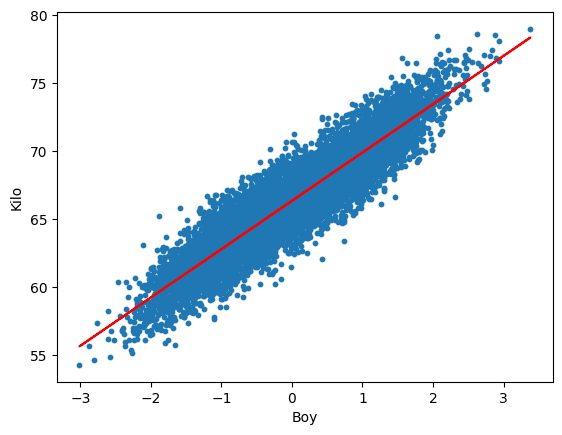

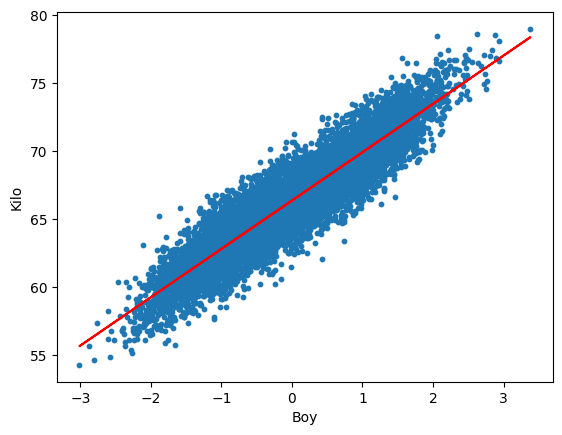

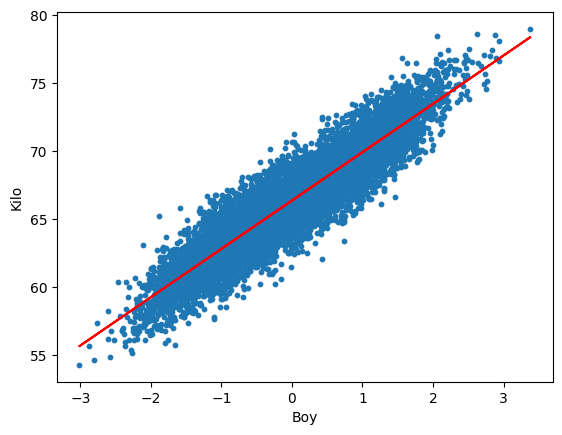

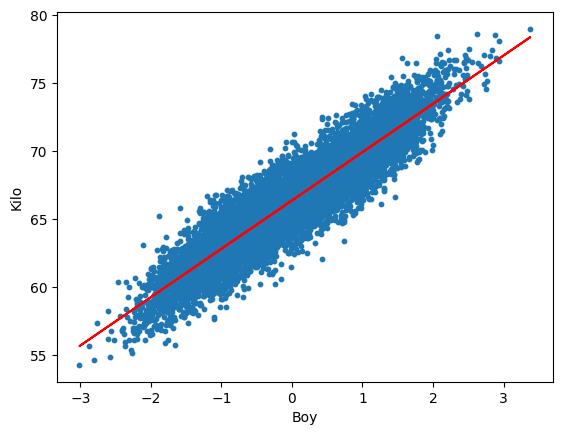

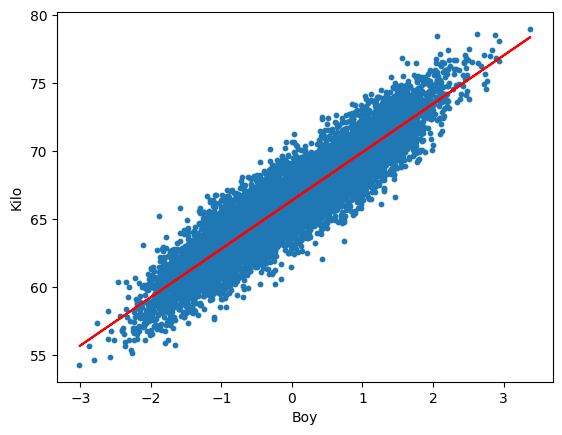

In [83]:
for i in range(10):
    plt.scatter(X, y, s=10)
    plt.plot(X, ypred_list[15*i], color='r')
    plt.xlabel("Boy")
    plt.ylabel("Kilo")
    plt.show()
    

In [84]:
# Performans Kriteri  (R^2 = 1 - SSE/SST)
def r2(SSE,SST):
    return 1-(SSE/SST)

In [85]:
SST = (y.std())**2*10000
r2(21437,SST)

0.8551893834584264

In [86]:
# Splitting the data
def splitting(veriseti, oran):
    Eğitim_seti_boyutu = int(len(veriseti) * oran)
    Eğitim_index=np.random.choice(range(0,len(veriseti)),replace=False,size=Eğitim_seti_boyutu)
    Eğitim_seti=veriseti.iloc[Eğitim_index]
    test_seti=veriseti[~veriseti.index.isin(Eğitim_index)]
    return Eğitim_seti, test_seti

In [87]:
Eğitim_seti, test_seti = splitting(df, 0.8)
Eğitim_seti, test_seti

(      Cinsiyet       Kilo         Boy
 1394         1  69.002165  188.330896
 423          1  70.615744  188.663832
 6876         0  63.017257  132.008181
 5047         0  64.692821  138.680814
 2597         1  68.957439  182.192513
 ...        ...        ...         ...
 2257         1  69.346474  181.851584
 3281         1  69.578525  180.714444
 2745         1  72.665242  219.095166
 5847         0  58.470984  103.045953
 8190         0  66.306550  154.904986
 
 [8000 rows x 3 columns],
       Cinsiyet       Kilo         Boy
 2            1  74.110105  212.740856
 7            1  68.348516  167.971111
 11           1  71.640805  213.741170
 18           1  69.640060  185.983958
 21           1  69.439440  197.731422
 ...        ...        ...         ...
 9962         0  65.754548  152.284628
 9969         0  68.202385  163.610847
 9975         0  66.251923  124.019917
 9980         0  60.472262  110.768229
 9995         0  66.172652  136.777454
 
 [2000 rows x 3 columns])

In [88]:
beta0 = np.random.rand()  
beta1 = np.random.rand()
alpha = 0.00001

In [89]:
x_eğitim = Eğitim_seti["Boy"]
x_test = test_seti["Boy"]

y_eğitim = Eğitim_seti["Kilo"]
y_test = test_seti["Kilo"]

In [90]:
X = standardize(x_eğitim)
num_iter = 1000        # 5. Aşama: 2-4 arasındaki adımları bir değere yakınsayana kadar tekrarlayın
SSE_list = []
for i in range(num_iter):
    ypred = tahmin(X,beta0,beta1)
    J = sse(y_eğitim,ypred)
    SSE_list.append(J)
    grad_beta0, grad_beta1 = gradyan(y,ypred,X)
    beta0, beta1 = parametreleri_guncelle(beta0,beta1,grad_beta0,grad_beta1,alpha)
SSE_list

[34567484.0829383,
 29260541.78721582,
 24768745.647724256,
 20966889.242571432,
 17748997.852012858,
 15025374.469655316,
 12720099.54623923,
 10768914.772691108,
 9117431.914027227,
 7719616.766308859,
 6536505.9777576495,
 5535120.966104089,
 4687548.658194335,
 3970163.4279622077,
 3362968.5447022305,
 2849038.7748655677,
 2414048.600201154,
 2045872.9015743202,
 1734248.9777372996,
 1470490.4780051056,
 1247245.274862671,
 1058290.5273312978,
 898359.2225950598,
 762993.3608274909,
 648419.690823906,
 551444.5326363724,
 469364.7554483755,
 399892.42924490874,
 341091.04998347815,
 291321.5605766721,
 249196.66304997297,
 213542.14835057617,
 183364.16589625974,
 157821.5205204347,
 136202.2246054947,
 117903.65180768626,
 102415.7391691624,
 89306.76938505485,
 78211.33691384172,
 68820.16249275117,
 60871.47214325506,
 54143.70036102285,
 48449.31409565441,
 43629.58536691242,
 39550.16680692499,
 36097.34679895593,
 33174.87982673156,
 30701.30368200394,
 28607.66874894146,
 26

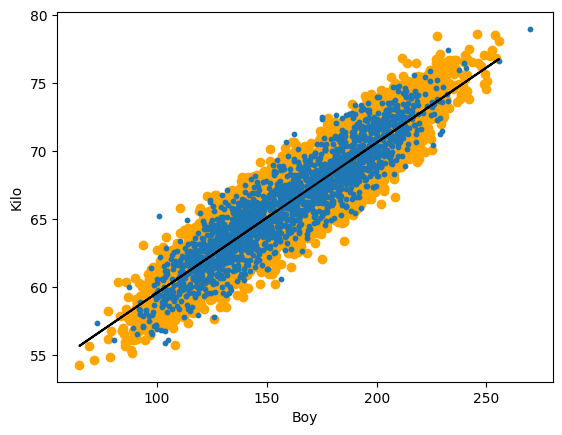

In [91]:
plt.scatter(x_eğitim, y_eğitim, color ="orange")
plt.scatter(x_test, y_test, s=10)
plt.plot(x_eğitim, ypred, color='black')
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.show()

In [92]:
x_test = standardize(x_test)
tahminler = [] 
for i in x_test:
    tahminler.append(tahmin(i,beta0,beta1))
tahminler = pd.DataFrame(tahminler,columns =['yşapka'])
tahminler = tahminler.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
sonuçlar = pd.concat([tahminler, y_test], axis=1)
sonuçlar

,yşapka,Kilo
0,72.225658,74.110105
1,67.215544,68.348516
2,72.337601,71.640805
3,69.231334,69.640060
4,70.545975,69.439440
...,...,...
1995,65.460093,65.754548
1996,66.727593,68.202385
1997,62.297032,66.251923
1998,60.814056,60.472262
